In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy

# Try a simple exponential

In [2]:
s, t = sympy.symbols("s t", real=True, positive=True)

In [38]:
Q = sympy.Matrix([[0, 0], [s, -s]])

In [39]:
P, D = Q.diagonalize()

In [40]:
P * sympy.exp(D * t) * P.inv()

Matrix([
[            1,         0],
[1 - exp(-s*t), exp(-s*t)]])

#### This is good - the second row is what we get if the initial distribution was (0,1)

# Try two independent exponentials

In [24]:
Q2 = sympy.Matrix([
    [0, 0, 0, 0],
    [s, -s, 0, 0],
    [s, 0, -s, 0],
    [0, s, s, -2*s],
])

In [25]:
P2, D2 = Q2.diagonalize()

In [30]:
P2

Matrix([
[1, 0,  0, 0],
[1, 0, -1, 1],
[1, 0,  1, 0],
[1, 1,  0, 1]])

In [31]:
D2

Matrix([
[0,    0,  0,  0],
[0, -2*s,  0,  0],
[0,    0, -s,  0],
[0,    0,  0, -s]])

In [41]:
P2 * sympy.exp(D2 * t) * P2.inv()

Matrix([
[                            1,                       0,                       0,           0],
[                1 - exp(-s*t),               exp(-s*t),                       0,           0],
[                1 - exp(-s*t),                       0,               exp(-s*t),           0],
[1 - 2*exp(-s*t) + exp(-2*s*t), exp(-s*t) - exp(-2*s*t), exp(-s*t) - exp(-2*s*t), exp(-2*s*t)]])

#### Start with an initial distribution of P(11) = 1; also collapse states 01 and 10 in the end:

In [42]:
collapse_2_to_1 = sympy.Matrix([
    [1, 0, 0],
    [0, 1, 0],
    [0, 1, 0],
    [0, 0, 1],    
])

In [46]:
dist_at_time_t = sympy.Matrix([0,0,0,1]).T * P2 * sympy.exp(D2 * t) * P2.inv() * collapse_2_to_1

#### We expect this to equal a binomial with $n=2$ and $p=e^{-st}$

In [79]:
prob = sympy.exp(-s*t)
binom_dist_at_time_t = sympy.Matrix([(1-prob)**2, 2*prob*(1-prob), prob**2])

In [80]:
binom_dist_at_time_t.expand()

Matrix([
[1 - 2*exp(-s*t) + exp(-2*s*t)],
[  2*exp(-s*t) - 2*exp(-2*s*t)],
[                  exp(-2*s*t)]])

In [81]:
dist_at_time_t.T

Matrix([
[1 - 2*exp(-s*t) + exp(-2*s*t)],
[  2*exp(-s*t) - 2*exp(-2*s*t)],
[                  exp(-2*s*t)]])

### What is the mean?

In [230]:
dist_at_time_t * sympy.Matrix([0, 1, 2])/2

Matrix([[exp(-s*t)]])

# Now try with coalescence

In [4]:
c0, c1, s = sympy.symbols("c0 c1 s", real=True, positive=True)

In [5]:
Qc = sympy.Matrix([
    [-c0, 0, 0, 0, c0, 0],
    [s, -s, 0, 0, 0, 0],
    [s, 0, -s, 0, 0, 0],
    [0, 0, 0, -c1, 0, c1],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, s, -s],
])

In [6]:
Pc, Dc = Qc.diagonalize()

In [7]:
Pc


Matrix([
[1, (-c0 + s)/s, 0, 0, 0,           0],
[1,           1, 0, 1, 0,           0],
[1,           1, 0, 0, 1,           0],
[1,           0, 1, 0, 0, c1/(c1 - s)],
[1,           0, 0, 0, 0,           0],
[1,           0, 0, 0, 0,           1]])

In [8]:
Dc

Matrix([
[0,   0,   0,  0,  0,  0],
[0, -c0,   0,  0,  0,  0],
[0,   0, -c1,  0,  0,  0],
[0,   0,   0, -s,  0,  0],
[0,   0,   0,  0, -s,  0],
[0,   0,   0,  0,  0, -s]])

In [9]:
eQct = Pc * sympy.exp(Dc * t) * Pc.inv()

In [10]:
eQct

Matrix([
[                                          exp(-c0*t),         0,         0,          0,                                      1 - exp(-c0*t),                                               0],
[     -s*exp(-s*t)/(-c0 + s) + s*exp(-c0*t)/(-c0 + s), exp(-s*t),         0,          0, c0*exp(-s*t)/(-c0 + s) - s*exp(-c0*t)/(-c0 + s) + 1,                                               0],
[c0*exp(-s*t)/(c0**2/s - c0) + s*exp(-c0*t)/(-c0 + s),         0, exp(-s*t),          0, c0*exp(-s*t)/(-c0 + s) - s*exp(-c0*t)/(-c0 + s) + 1,                                               0],
[                                                   0,         0,         0, exp(-c1*t), -c1*exp(-s*t)/(c1 - s) - s*exp(-c1*t)/(-c1 + s) + 1, c1*exp(-s*t)/(c1 - s) + c1*exp(-c1*t)/(-c1 + s)],
[                                                   0,         0,         0,          0,                                                   1,                                               0],
[                              

In [11]:
collapse_c_to_1 = sympy.Matrix([
    [1, 0, 0],
    [0, 1, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 0],
    [0, 0, 1],    
])

In [12]:
sympy.simplify(eQct * collapse_c_to_1)

Matrix([
[                                                                                1,         0,                                                       0],
[                                                                    1 - exp(-s*t), exp(-s*t),                                                       0],
[                                                                    1 - exp(-s*t), exp(-s*t),                                                       0],
[(-c1*exp(c1*t) + s*exp(s*t) + (c1 - s)*exp(t*(c1 + s)))*exp(-t*(c1 + s))/(c1 - s),         0, (-c1*exp(c1*t) + s*exp(s*t))*exp(-t*(c1 + s))/(-c1 + s)],
[                                                                                1,         0,                                                       0],
[                                                                    1 - exp(-s*t),         0,                                               exp(-s*t)]])

#### This is the expected proportions at time t if we start P(11)=1:

In [13]:
sol = (sympy.Matrix([0, 0, 0, 1, 0, 0]).T * eQct * collapse_c_to_1).T

In [14]:
sympy.simplify(sol)

Matrix([
[(-c1*exp(c1*t) + s*exp(s*t) + (c1 - s)*exp(t*(c1 + s)))*exp(-t*(c1 + s))/(c1 - s)],
[                                                                                0],
[                          (-c1*exp(c1*t) + s*exp(s*t))*exp(-t*(c1 + s))/(-c1 + s)]])

In [18]:
sol.subs(c0, 0)

Matrix([
[         -c1*exp(-s*t)/(c1 - s) - s*exp(-c1*t)/(-c1 + s) + 1],
[                                                           0],
[c1*exp(-s*t)/(c1 - s) + c1*exp(-c1*t)/(-c1 + s) + exp(-c1*t)]])

In [16]:
sympy.simplify(sol)[2]

(-c1*exp(c1*t) + s*exp(s*t))*exp(-t*(c1 + s))/(-c1 + s)

In [17]:
sympy.simplify(sol[2] / sol.subs(c1, 0)[2])

(-c1*exp(c1*t) + s*exp(s*t))*exp(-t*(c1 + s))/(-c1 + s)

### Get the mean 

In [19]:
collapse_c_to_mean = sympy.Matrix([0, 1, 1, 2, 0, 2])/2

In [20]:
eQct

Matrix([
[                                          exp(-c0*t),         0,         0,          0,                                      1 - exp(-c0*t),                                               0],
[     -s*exp(-s*t)/(-c0 + s) + s*exp(-c0*t)/(-c0 + s), exp(-s*t),         0,          0, c0*exp(-s*t)/(-c0 + s) - s*exp(-c0*t)/(-c0 + s) + 1,                                               0],
[c0*exp(-s*t)/(c0**2/s - c0) + s*exp(-c0*t)/(-c0 + s),         0, exp(-s*t),          0, c0*exp(-s*t)/(-c0 + s) - s*exp(-c0*t)/(-c0 + s) + 1,                                               0],
[                                                   0,         0,         0, exp(-c1*t), -c1*exp(-s*t)/(c1 - s) - s*exp(-c1*t)/(-c1 + s) + 1, c1*exp(-s*t)/(c1 - s) + c1*exp(-c1*t)/(-c1 + s)],
[                                                   0,         0,         0,          0,                                                   1,                                               0],
[                              

In [21]:
sympy.simplify((eQct * collapse_c_to_mean))

Matrix([
[                                                      0],
[                                            exp(-s*t)/2],
[                                            exp(-s*t)/2],
[(-c1*exp(c1*t) + s*exp(s*t))*exp(-t*(c1 + s))/(-c1 + s)],
[                                                      0],
[                                              exp(-s*t)]])

In [22]:
sympy.simplify(eQct * collapse_c_to_1).row(3)

Matrix([[(-c1*exp(c1*t) + s*exp(s*t) + (c1 - s)*exp(t*(c1 + s)))*exp(-t*(c1 + s))/(c1 - s), 0, (-c1*exp(c1*t) + s*exp(s*t))*exp(-t*(c1 + s))/(-c1 + s)]])

In [24]:
sympy.simplify(sympy.simplify(eQct * collapse_c_to_1).row(3) * sympy.Matrix([0,1,2])/2)[0]

(c1*exp(c1*t) - s*exp(s*t))*exp(-t*(c1 + s))/(c1 - s)

# Simulate 

In [25]:
from sympy.utilities.autowrap import autowrap

In [26]:
%%time
wsol = autowrap(sol)

CPU times: user 29.6 ms, sys: 24.6 ms, total: 54.1 ms
Wall time: 17.6 s


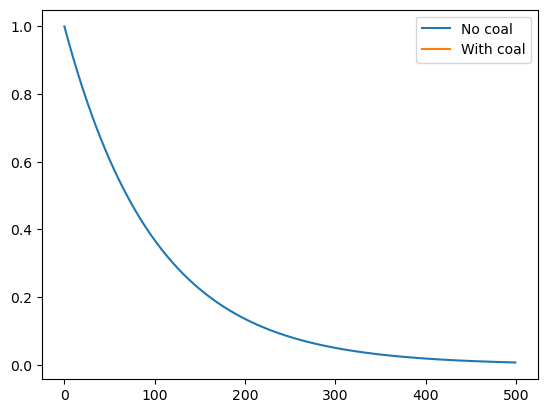

In [32]:
ts = np.arange(500)
no_coal = np.exp(-0.01*ts)
yes_coal = np.array([wsol(c1=0.01, s=0.01, t=t)[2] for t in ts]) 
# yes_coal_half = np.array([wsol(c1=0.01, s=0.01, t=t*2)[2] for t in ts]) 
plt.plot(ts, no_coal, '-', label="No coal")
plt.plot(ts, yes_coal, '-', label="With coal")
# plt.plot(ts, yes_coal_half, '-', label="With coal, x2 mistake")
plt.legend()

In [33]:
yes_coal

array([[inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
       [inf],
      

/tmp/ipykernel_1530211/1183771719.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(np.log(yes_coal/no_coal).ravel() / ts)


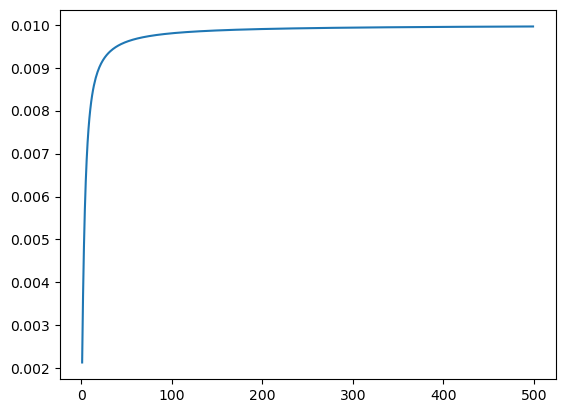

In [175]:
plt.plot(np.log(yes_coal/no_coal).ravel() / ts)